<a href="https://colab.research.google.com/github/ombhope/ma22c030_2023_pl/blob/main/Assignment%2011/MA22C030PLA11(_Neighbors_color).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np



In [68]:
def generate_states(num_bits):
    states = []
    for i in range(2 ** num_bits):
        state = format(i, f'0{num_bits}b')  # Binary representation
        state = state.replace('0', 'R').replace('1', 'B')  # Replace 0 with 'R' and 1 with 'B'
        states.append(state)
    return states



In [69]:
num_bits_alt = 3
states_alt = generate_states(num_bits_alt)
num_states_alt = len(states_alt)
print("Number of states=", num_states_alt)
for state in states_alt:
    print(state)



Number of states= 8
RRR
RRB
RBR
RBB
BRR
BRB
BBR
BBB


In [70]:
def transition_probability_matrix(num_bits):
    transition_probs = {}
    for state in states_alt:
        transition_probs[state] = {}
        for neighbor in states_alt:
            diff_count = sum(1 for i in range(len(state)) if state[i] != neighbor[i])
            if diff_count == 1:
                transition_probs[state][neighbor] = 1 / num_bits
            else:
                transition_probs[state][neighbor] = 0
    return transition_probs



In [71]:
transition_probs_alt = transition_probability_matrix(num_bits_alt)



In [72]:
def create_markov_chain(states, transition_probs):
    G_alt = nx.DiGraph()
    G_alt.add_nodes_from(states)

    for state in states:
        for neighbor, prob in transition_probs[state].items():
            if prob > 0:
                G_alt.add_edge(state, neighbor, weight=prob)

    pos_alt = nx.spring_layout(G_alt)
    labels_alt = {state: state for state in states}
    edge_labels_alt = {(u, v): f"{p:.2f}" for u, v, p in G_alt.edges(data='weight')}
    plt.figure()
    nx.draw(G_alt, pos_alt, with_labels=True, node_size=2000, node_color='yellow', labels=labels_alt)
    nx.draw_networkx_edge_labels(G_alt, pos_alt, edge_labels=edge_labels_alt)
    plt.title("Markov Chain Directed Graph")
    plt.show()



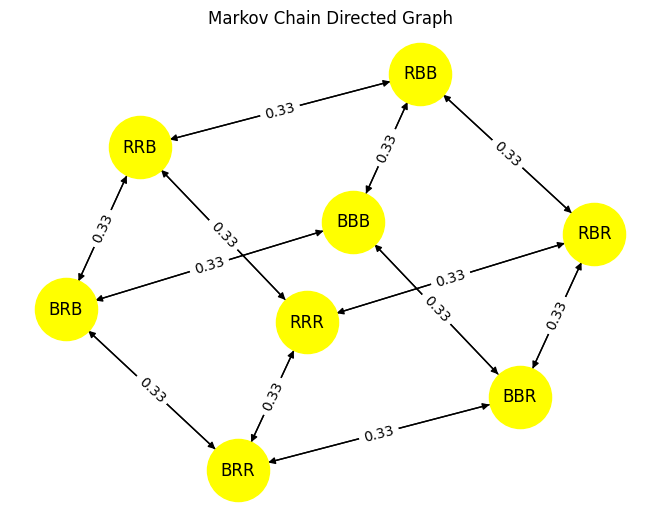

In [73]:
create_markov_chain(states_alt, transition_probs_alt)



In [74]:
def find_absorbing_states(states, transition_probs):
    absorbing_states_alt = [state for state in states if all(transition_probs[state][neighbor] == 0 for neighbor in states if neighbor != state)]
    return absorbing_states_alt



In [75]:
absorbing_states_alt = find_absorbing_states(states_alt, transition_probs_alt)
print(f"Absorbing states: {absorbing_states_alt}")



Absorbing states: []


In [76]:
def compute_absorbing_probabilities(num_bits_alt):
    num_states_alt = 2 ** num_bits_alt

    absorbing_states_alt = [0, num_bits_alt]
    absorbing_probabilities_alt = np.zeros(num_states_alt, dtype=float)

    for k in absorbing_states_alt:
        absorbing_probabilities_alt += np.math.comb(num_bits_alt, k) / num_states_alt

    return absorbing_probabilities_alt



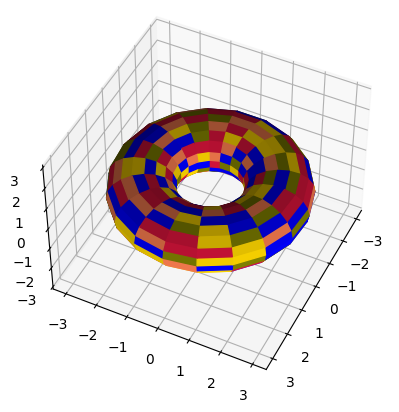

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig_alt = plt.figure()
ax_alt = fig_alt.add_subplot(111, projection='3d')

# Generate toroidal surface data
angs_alt = np.linspace(0, 2. * np.pi, 20)
theta_alt, phi_alt = np.meshgrid(angs_alt, angs_alt)
x_alt = (2 + np.cos(theta_alt)) * np.cos(phi_alt)
y_alt = (2 + np.cos(theta_alt)) * np.sin(phi_alt)
z_alt = np.sin(theta_alt)
rng_alt = np.random.default_rng()
randind_alt = rng_alt.integers(5, size=x_alt.shape)
colors_alt = np.array(['crimson', 'coral', 'gold', 'blue', 'olive'])[randind_alt]

# Plot the toroidal surface
surf_alt = ax_alt.plot_surface(x_alt, y_alt, z_alt, facecolors=colors_alt, linewidth=1)

# Set view angles and z-axis limits
ax_alt.view_init(46, 26)
ax_alt.set_zlim(-3, 3)

plt.show()

In [78]:
def simulate_toroidal_color_process_alt(num_bits, num_colors, max_iterations=100):
    initial_state_alt = np.random.randint(0, num_colors, size=(num_bits, num_bits))

    absorbing_state_alt = None
    for _ in range(max_iterations):
        i, j = np.random.randint(0, num_bits, size=2)
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        neighbor_i, neighbor_j = (i + di) % num_bits, (j + dj) % num_bits
        chosen_color_alt = initial_state_alt[neighbor_i, neighbor_j]
        initial_state_alt[i, j] = chosen_color_alt

        if np.all(initial_state_alt == initial_state_alt[0, 0]):
            absorbing_state_alt = initial_state_alt
            break

    return initial_state_alt, absorbing_state_alt



In [79]:
from matplotlib.animation import FuncAnimation



In [80]:
def simulate_toroidal_color_process_alt(num_bits, num_colors, max_iterations=1000, initial_state_alt=None):
    if initial_state_alt is None:
        initial_state_alt = np.random.randint(0, num_colors, size=(num_bits, num_bits))

    states_alt = [initial_state_alt.copy()]
    absorbing_state_alt = None

    for _ in range(max_iterations):
        i, j = np.random.randint(0, num_bits, size=2)
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        neighbor_i, neighbor_j = (i + di) % num_bits, (j + dj) % num_bits
        chosen_color_alt = initial_state_alt[neighbor_i, neighbor_j]
        initial_state_alt[i, j] = chosen_color_alt
        states_alt.append(initial_state_alt.copy())
        if np.all(initial_state_alt == initial_state_alt[0, 0]):
            absorbing_state_alt = initial_state_alt
            break

    return states_alt, absorbing_state_alt



In [81]:
def animate_simulation_alt(num_bits, num_colors, max_iterations=1000):
    initial_state_alt = np.random.randint(0, num_colors, size=(num_bits, num_bits))
    states_alt, absorbing_state_alt = simulate_toroidal_color_process_alt(num_bits, num_colors, max_iterations, initial_state_alt)
    num_frames_alt = len(states_alt)
    fig_alt, ax_alt = plt.subplots()
    img_alt = ax_alt.imshow(states_alt[0], cmap='viridis')

    def update_alt(frame_alt):
        img_alt.set_array(states_alt[frame_alt])
        return img_alt,

    # Create the animation
    anim_alt = FuncAnimation(fig_alt, update_alt, frames=range(num_frames_alt), repeat=False)
    plt.axis('off')
    plt.title("Toroidal Grid Color Simulation")
    plt.show()



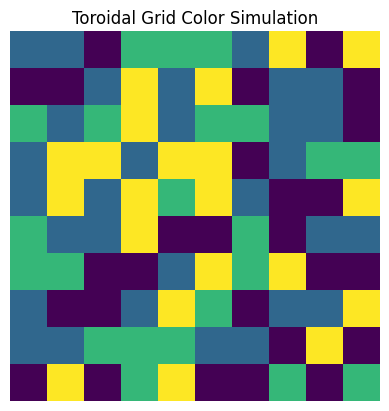

In [82]:
num_bits_alt = 10
num_colors_alt = 4
max_iterations_alt = 500
animate_simulation_alt(num_bits_alt, num_colors_alt, max_iterations_alt)
